In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data1 = pd.read_csv('ch.xackaton_fuv2_bitovie_abon_parametri_dogovora.csv')

/media/tanushenka/MrBig/projects/mosenergosbyt/env37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
data = pd.DataFrame(data=[data1.id,data1.type_ls_building])
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,8244782,8244783,8244784,8244785,8244786,8244787,8244788,8244789,8244790,8244791
id,3003.0,3006.0,3009.0,3012.0,3015.0,3018.0,3021.0,3024.0,3027.0,3030.0,...,297393552.0,297393555.0,297393558.0,297393561.0,297393564.0,297393567.0,297393570.0,297393573.0,297393576.0,297393579.0
type_ls_building,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data1 = pd.read_csv('ch.xackaton_suvk_bitovie_abon_parametri.csv')

In [10]:
data1.finance_status.unique()

array(['Не оплачена', 'Оплачена', 'Информация о платеже', 'Ч/оплата',
       'Переплата'], dtype=object)

In [11]:
print(data1.shape)
data1 = data1[data1.finance_status!='Не оплачена']
data1.shape

(1280165, 9)


(549560, 9)

In [12]:
list_good_user = list(data1.id.unique())
len(list_good_user)

457229

In [15]:
data2.columns

Index(['dt', 'id', 'request_status', 'request_type', 'topic_level_1',
       'topic_level_2', 'topic_level_3', 'task_priority', 'task_status',
       'task_type', 'work_done', 'topic_attribute', 'task_number',
       'request_number'],
      dtype='object')

(46765, 14)
(35756, 14)


<AxesSubplot:>

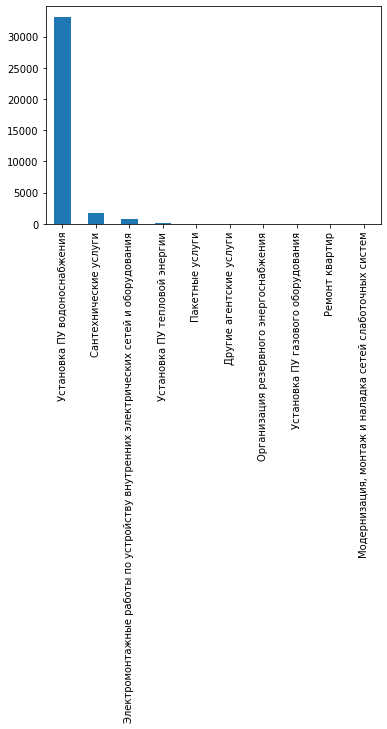

In [17]:
data2 = pd.read_csv('ch.xackaton_suvk_bitovie_abon_obrascheniya_2019_2021.csv')
data2 = data2[data2.topic_level_2!='Не определено']
list_uslugi = list(data2.topic_level_2.unique())
print(data2.shape)
data2 = data2[data2.id.isin(list_good_user)]
print(data2.shape)
data2.topic_level_2.value_counts().plot(kind='bar')

In [20]:
d2 = data2.groupby(by = ['topic_level_2']).count().sort_values(by=['id'],ascending=False).id
d2

topic_level_2
Установка ПУ водоноснабжения                                                           33170
Сантехнические услуги                                                                   1770
Электромонтажные работы по устройству внутренних электрических сетей и оборудования      709
Установка ПУ тепловой энергии                                                             82
Пакетные услуги                                                                           11
Другие агентские услуги                                                                    7
Организация резервного энергоснабжения                                                     4
Модернизация, монтаж и наладка сетей слаботочных систем                                    1
Ремонт квартир                                                                             1
Установка ПУ газового оборудования                                                         1
Name: id, dtype: int64

In [25]:
data=data.T
data.head(2)


,id,type_ls_building
0,3003,NaN
1,3006,NaN


In [29]:
d3 = data.groupby(by = ['type_ls_building']).count().sort_values(by=['id'],ascending=False).id
d3

type_ls_building
Жилой дом                                 7751
Частный                                   5559
Участок под строительство                 3626
Садоводческий участок                     1789
Дом блокированной застройки                600
Дача                                       545
Деревянный                                 427
Кирпичный                                  176
Хоз. постройки                             131
Гараж                                      112
Коттедж                                     74
Многоквартирный                             66
Блочный                                     39
Каркасный                                   11
Панельный                                   10
Баня                                         8
Особняк                                      4
Повышенной комфортности                      4
Пент-хаус                                    3
Монолит                                      2
Многоквартирный дом, нежилое помещение     

In [31]:
data['type_ls_building2']= data.type_ls_building
data.type_ls_building2.fillna(value='Жилой дом',inplace=True)

In [32]:
data.head(2)

,id,type_ls_building,type_ls_building2
0,3003,NaN,Жилой дом
1,3006,NaN,Жилой дом


In [78]:
data.shape

(8244792, 4)

In [79]:
len(data.id.unique())

8229204

In [88]:
data2['type_ls_building2'] = data2['request_type']
data_id = data.set_index('id')

def get_building(i):
    try:
        z = data_id.loc[i].type_ls_building2
        if isinstance(z, pd.Series):
            return z.iloc[0]
        else:
            return z
    except KeyError:
        return 'Жилой дом'

data2['type_ls_building2'] = data2.id.apply(get_building)
data2.tail(2)


,dt,id,request_status,request_type,topic_level_1,topic_level_2,topic_level_3,task_priority,task_status,task_type,work_done,topic_attribute,task_number,request_number,type_ls_building2
5589803,2020-07-10,67911600,обработано с заданием,Личная явка,Не определено,Установка ПУ водоноснабжения,Агентские услуги,Средний,Создана заявка КУ,Платная заявка,NaN,Другое,"458695672,0","677541762,0",Жилой дом
5589913,2020-07-10,68370060,обработано с заданием,Личная явка,Не определено,Установка ПУ водоноснабжения,Агентские услуги,Средний,Создана заявка КУ,Платная заявка,NaN,Другое,"458662362,0","677495312,0",Жилой дом


In [97]:
data2.to_csv('data2.csv',index=False)


In [96]:
data2.tail(2)

,dt,id,request_status,request_type,topic_level_1,topic_level_2,topic_level_3,task_priority,task_status,task_type,work_done,topic_attribute,task_number,request_number,type_ls_building2
5589803,2020-07-10,67911600,обработано с заданием,Личная явка,Не определено,Установка ПУ водоноснабжения,Агентские услуги,Средний,Создана заявка КУ,Платная заявка,NaN,Другое,"458695672,0","677541762,0",Жилой дом
5589913,2020-07-10,68370060,обработано с заданием,Личная явка,Не определено,Установка ПУ водоноснабжения,Агентские услуги,Средний,Создана заявка КУ,Платная заявка,NaN,Другое,"458662362,0","677495312,0",Жилой дом


In [98]:
# sdd=list(data2.type_ls_building2.unique())
# sdd
data2[data2.type_ls_building2!="Жилой дом"][:3]

,dt,id,request_status,request_type,topic_level_1,topic_level_2,topic_level_3,task_priority,task_status,task_type,work_done,topic_attribute,task_number,request_number,type_ls_building2
219172,2019-09-11,13194174,обработано с заданием,Личная явка,Не определено,Установка ПУ водоноснабжения,Агентские услуги,Средний,Создана заявка КУ,Платная заявка,NaN,Другое,"435940062,0","646935812,0",Частный
239791,2020-07-24,119826108,обработано с заданием,Личная явка,Не определено,Электромонтажные работы по устройству внутренн...,Агентские услуги,Средний,Создана заявка КУ,Платная заявка,NaN,Сотрудник Мосэнергосбыта,"459613252,0","678701572,0",Садоводческий участок
383908,2020-08-10,2220456,обработано с заданием,Личная явка,Не определено,Установка ПУ водоноснабжения,Агентские услуги,Средний,Создана заявка КУ,Платная заявка,NaN,Другое,"460291122,0","679753582,0",Гараж


In [127]:
#не жилой дом
i2 = 0
data_ = data[data.type_ls_building2!='Жилой дом']#[110:150]
data_['uslugi']= data.apply(lambda n: [])
for row in data_.itertuples():
#     print(row)
    p = data2[data2.type_ls_building2==row.type_ls_building2].topic_level_2
    p2 = set()
    for i in p:
        p2.add(i)
#     print(len(p2))
    
    data_.uslugi.iloc[i2]=frozenset(p2)
    i2 +=1
data_  

/media/tanushenka/MrBig/projects/mosenergosbyt/env37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/media/tanushenka/MrBig/projects/mosenergosbyt/env37/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/media/tanushenka/MrBig/projects/mosenergosbyt/env37/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A valu

,id,type_ls_building,type_ls_building2,uslugi
6657,97182,Частный,Частный,(Установка ПУ водоноснабжения)
20689,174723,Многоквартирный,Многоквартирный,()
85298,927747,Многоквартирный,Многоквартирный,()
135333,1401945,Частный,Частный,(Установка ПУ водоноснабжения)
136175,1425042,Деревянный,Деревянный,()
...,...,...,...,...
7849654,286285563,Частный,Частный,(Установка ПУ водоноснабжения)
7849681,286285644,Участок под строительство,Участок под строительство,()
7849682,286285647,Участок под строительство,Участок под строительство,()
7849728,286285785,Участок под строительство,Участок под строительство,()


In [135]:
i2 = 0
data2_ = data[data.type_ls_building2=='Жилой дом'][:50]
data2_['uslugi']= data.apply(lambda n: [])
for row in data2_.itertuples():
#     print(row)
    p = data2[data2.type_ls_building2==row.type_ls_building2].topic_level_2
    p2 = set()
    for i in p:
        p2.add(i)
#     print(len(p2))
    
    data2_.uslugi.iloc[i2]=frozenset(p2)
    i2 +=1
 

/media/tanushenka/MrBig/projects/mosenergosbyt/env37/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [137]:
# data2_

In [133]:
s=set(data.type_ls_building2.unique())-set(fg.type_ls_building2.unique())

In [134]:
s

{'Гараж',
 'Дом блокированной застройки',
 'Жилой дом',
 'Коттедж',
 'Садоводческий участок',
 'Частный'}

In [131]:
fg = data_[data_.uslugi==frozenset()]#.groupby(by = ['uslugi'])
print(len(fg.type_ls_building2.unique()))
fg.type_ls_building2.unique()


15


array(['Многоквартирный', 'Деревянный', 'Панельный', 'Блочный',
       'Каркасный', 'Кирпичный', 'Участок под строительство',
       'Хоз. постройки', 'Дача', 'Повышенной комфортности', 'Монолит',
       'Особняк', 'Баня', 'Многоквартирный дом, нежилое помещение',
       'Пент-хаус'], dtype=object)

In [148]:
s1 = ['Многоквартирный', 'Панельный',
        'Кирпичный', 'Повышенной комфортности', 'Монолит','Пент-хаус']

s2= ['Деревянный','Блочный','Каркасный','Особняк']
s3 = ['Участок под строительство','Хоз. постройки','Баня','Многоквартирный дом, нежилое помещение']
s4 = ['Дача']

In [128]:
# data_.uslugi.unique()

array([frozenset({'Установка ПУ водоноснабжения'}), frozenset(),
       frozenset({'Электромонтажные работы по устройству внутренних электрических сетей и оборудования'})],
      dtype=object)

In [141]:
data_[data_.type_ls_building2=='Садоводческий участок'].uslugi.iloc[0]

frozenset({'Электромонтажные работы по устройству внутренних электрических сетей и оборудования'})

In [142]:
data_[data_.type_ls_building2=='Гараж'].uslugi.iloc[0]

frozenset({'Установка ПУ водоноснабжения'})

In [143]:
data_[data_.type_ls_building2=='Коттедж'].uslugi.iloc[0]

frozenset({'Установка ПУ водоноснабжения'})

In [146]:
zhp=data2_.uslugi.iloc[0]
garazh = data_[data_.type_ls_building2=='Гараж'].uslugi.iloc[0]
cottege = data_[data_.type_ls_building2=='Коттедж'].uslugi.iloc[0]
dacha = data_[data_.type_ls_building2=='Садоводческий участок'].uslugi.iloc[0]

In [153]:
def get_uslugi(row):
#     print(row)
    b = row.type_ls_building2
    if b in s1:
        return zhp
    elif b in s2:
        return cottege
    elif b in s3:
        return garazh
    elif b in s4:
        return dacha
    else:
        return row.uslugi

data_['uslugi'] = data_.apply(get_uslugi, axis=1)


/media/tanushenka/MrBig/projects/mosenergosbyt/env37/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [158]:
data_.to_csv('uslugi.csv',index=False)

In [155]:
data2.head(2)

,dt,id,request_status,request_type,topic_level_1,topic_level_2,topic_level_3,task_priority,task_status,task_type,work_done,topic_attribute,task_number,request_number,type_ls_building2
7,2019-09-02,30429,обработано с заданием,Личная явка,Не определено,Установка ПУ водоноснабжения,Агентские услуги,Средний,Создана заявка КУ,Платная заявка,NaN,Другое,"434994502,0","645733932,0",Жилой дом
196,2019-09-02,2268012,обработано с заданием,Личная явка,Не определено,Установка ПУ водоноснабжения,Агентские услуги,Средний,Создана заявка КУ,Платная заявка,NaN,Другое,"434956332,0","645682292,0",Жилой дом


In [163]:
fh=data_.groupby(by='type_ls_building2').count()
print('Жилой дом')
print(data2_.uslugi.iloc[0])
print('=======================')
for i in list(fh.index):
    print(i)
    print(data_[data_.type_ls_building2==i].uslugi.iloc[0])
    print('=======================')

Жилой дом
frozenset({'Другие агентские услуги', 'Сантехнические услуги', 'Пакетные услуги', 'Модернизация, монтаж и наладка сетей слаботочных систем', 'Организация резервного энергоснабжения', 'Установка ПУ тепловой энергии', 'Электромонтажные работы по устройству внутренних электрических сетей и оборудования', 'Ремонт квартир', 'Установка ПУ водоноснабжения', 'Установка ПУ газового оборудования'})
Баня
frozenset({'Установка ПУ водоноснабжения'})
Блочный
frozenset({'Установка ПУ водоноснабжения'})
Гараж
frozenset({'Установка ПУ водоноснабжения'})
Дача
frozenset({'Электромонтажные работы по устройству внутренних электрических сетей и оборудования'})
Деревянный
frozenset({'Установка ПУ водоноснабжения'})
Дом блокированной застройки
frozenset({'Установка ПУ водоноснабжения'})
Каркасный
frozenset({'Установка ПУ водоноснабжения'})
Кирпичный
frozenset({'Другие агентские услуги', 'Сантехнические услуги', 'Пакетные услуги', 'Модернизация, монтаж и наладка сетей слаботочных систем', 'Организаци

In [36]:
for fn in ('uslugi.yaml', 'uslugi_new.yaml'):
    p = Path(fn)
    with p.open() as f:
        data = yaml.safe_load(f)
    with p.with_suffix('.json').open('w') as f:
        json.dump(data, f, ensure_ascii=False, indent=3)